In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df = pd.read_excel("treated_AQI_data_station_10.xlsx")

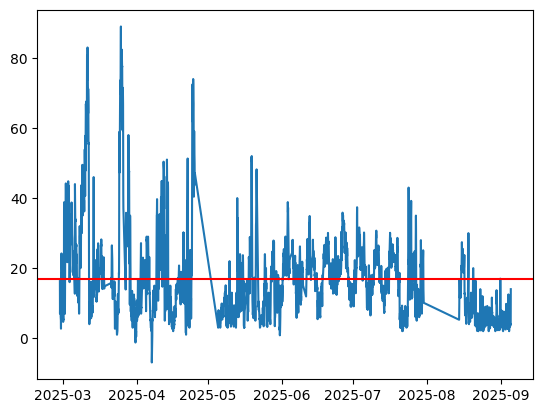

In [ ]:
plt.plot(df[], df["pm25"])
plt.axhline(df["pm25"].mean(), color = "red")

In [14]:
df['date'] = df['date_time'].dt.date
df['month'] = df['date_time'].dt.month

spring_months = [3, 4, 5]

df['spring'] = df['month'].isin(spring_months).astype(int)

avg_day_spring = df[df['spring'] == 1].groupby('date')['pm25'].mean()

who_guideline = 15
high_pollution_days = (avg_day_spring > who_guideline).sum()

print(high_pollution_days)

40


In [ ]:
n = len(avg_day_spring) #total number of spring days

k = high_pollution_days #total number of observed high pollution days

p0 = 35/100 #claimed proportion by the report

b_nomtest = stats.binomtest(k , n, p0, alternative='greater')
print(b_nomtest)

BinomTestResult(k=40, n=81, alternative='greater', statistic=0.49382716049382713, pvalue=0.005407334937655098)


The city report claimed that 35% of spring days would have a high pollution.
Our data shows that 49.38% days actually had a high pollution.
After calculation, the probability of observing this high a proportion by random chance, if the true rate were only 35%, is just 0.54%.

The actual air quality situation appears to be significantly worse than what the city report claimed. The pollution levels exceed the WHO guidelines on nearly half of spring days (49.38%), which is substantially higher than the reported 35%.